# Julia test notebook

Author: Matthew K. MacLeod

Goals, test the following in Julia:
 * basics
 * linear algebra
 * statistics
 * visualization

## Background

Julia has some obvious benifits:
* speed
* dynamic nature
* statistical tools of R, linear algebra of matlab, python feel...
* most of source code written in Julia itself

some of my concerns:
* mutability 
* list comprehensions lack conditionals
* lack of tail call optimization
* not yet >= 1.0

Julia is an interesting language which I hope gets more attention.

In [1]:
# these notes work with version 0.5.0-dev+876
VERSION

v"0.5.0-dev+876"

## Introduction to Julia

In [2]:
collect(1:10)

10-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [3]:
div(10,3)

3

In [4]:
10 % 3

1

### functional 

In [5]:
# list comps
squares = [i^2 for i in collect(1:10)]  # julia indices start with 1

10-element Array{Int64,1}:
   1
   4
   9
  16
  25
  36
  49
  64
  81
 100

In [6]:
# could also do 
cubes = [i^3 for i in 1:10]

10-element Array{Int64,1}:
    1
    8
   27
   64
  125
  216
  343
  512
  729
 1000

In [7]:
fib(n) = n < 2 ? n : fib(n - 1) + fib(n - 2)
fib(40)

102334155

### filter

while list comprehensions dont have a filter, it's not really a problem as we can
get the same desired functionality with map and filter

In [52]:
array = 1:10

10-element UnitRange{Int64}:
 1,2,3,4,5,6,7,8,9,10

In [53]:
# even squares
filter(x -> x % 2 == 0, map(x -> x * x, array))

5-element Array{Int64,1}:
   4
  16
  36
  64
 100

In [54]:
# sum squares
reduce(+, map(x -> x * x, array))

385

In [55]:
# sum even squares
reduce(+, filter(x -> x % 2 == 0, map(x -> x*x, array)))

220

#### IO 

In [8]:
outfile = open("test.txt", "w")

IOStream(<file test.txt>)

In [9]:
for i in 1:10
    println(outfile, "i is $i")
end
close(outfile)

In [10]:
# shell out
;cat test.txt

LoadError: LoadError: syntax: extra token "test" after end of expression
while loading In[10], in expression starting on line 2

In [11]:
infile = open("test.txt", "r")

IOStream(<file test.txt>)

In [12]:
lines = readlines(infile)

10-element Array{ByteString,1}:
 "i is 1\n" 
 "i is 2\n" 
 "i is 3\n" 
 "i is 4\n" 
 "i is 5\n" 
 "i is 6\n" 
 "i is 7\n" 
 "i is 8\n" 
 "i is 9\n" 
 "i is 10\n"

In [13]:
map(split,lines)

10-element Array{Array{SubString{ASCIIString},1},1}:
 SubString{ASCIIString}["i","is","1"] 
 SubString{ASCIIString}["i","is","2"] 
 SubString{ASCIIString}["i","is","3"] 
 SubString{ASCIIString}["i","is","4"] 
 SubString{ASCIIString}["i","is","5"] 
 SubString{ASCIIString}["i","is","6"] 
 SubString{ASCIIString}["i","is","7"] 
 SubString{ASCIIString}["i","is","8"] 
 SubString{ASCIIString}["i","is","9"] 
 SubString{ASCIIString}["i","is","10"]

In [14]:
[float(line[3]) for line in map(split, lines)]

10-element Array{Any,1}:
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0

## Linear Algebra

In [15]:
A = [1 2; 3 4]

2x2 Array{Int64,2}:
 1  2
 3  4

In [16]:
eig(A)

([-0.3722813232690143,5.372281323269014],
2x2 Array{Float64,2}:
 -0.824565  -0.415974
  0.565767  -0.909377)

In [17]:
eigvals(A)

2-element Array{Float64,1}:
 -0.372281
  5.37228 

In [18]:
inv(A)

2x2 Array{Float64,2}:
 -2.0   1.0
  1.5  -0.5

In [19]:
det(A)

-2.0

In [20]:
norm(A)

5.464985704219043

#### Solve linear equation: 

#### Ax=b

In [21]:
A = rand(5,5)
b = rand(5,1)
print("A:",A)
print("b:",b)

A:[

In [22]:
x = A \ b

5x1 Array{Float64,2}:
  1.40911   
 -0.787195  
 -1.29988   
  0.00984123
  1.73082   

0.14852867564787386 0.14110834076603673 0.868574219393192 0.047232455636973425 0.813389626403906
 0.529121003080085 0.45900792755302877 0.4593644994277759 0.33326016579308604 0.5574139455143803
 0.7006495479958923 0.22786616830269235 0.6168345398070607 0.706395297234977 0.4940620216777254
 0.7566212142066591 0.6171553722854948 0.7985200681548654 0.24182756085058643 0.5801880449265744
 0.012360353814833136 0.3698989225491862 0.20303799845416082 0.41473249949462065 0.5672686813728831]b:[0.37746293929245445
 0.7552040300258736
 0.8681891096359546
 0.5489394992063645
 0.4482297565479243]

In [23]:
A = [0 1
1 1
2 1
3 1
4 1
5 1
6.0 1
7 1
8 1]

9x2 Array{Float64,2}:
 0.0  1.0
 1.0  1.0
 2.0  1.0
 3.0  1.0
 4.0  1.0
 5.0  1.0
 6.0  1.0
 7.0  1.0
 8.0  1.0

In [24]:
y = [19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24]

9-element Array{Float64,1}:
 19.0
 20.0
 20.5
 21.5
 22.0
 23.0
 23.0
 25.5
 24.0

In [25]:
A \ y

2-element Array{Float64,1}:
  0.716667
 19.1889  

## Statistics

In [26]:
# uniform random numbers
rand(10)

10-element Array{Float64,1}:
 0.122253 
 0.0413091
 0.115186 
 0.231626 
 0.81853  
 0.551265 
 0.764501 
 0.567039 
 0.22472  
 0.697857 

In [27]:
# random normal numbers
randn(10)

10-element Array{Float64,1}:
  0.399743 
  0.0548085
  0.889281 
 -1.32727  
  0.0751477
  0.0561877
 -1.02881  
 -0.288029 
  1.60587  
  0.0644783

In [28]:
linspace(1.0,2.0,10)

10-element LinSpace{Float64}:
 1.0,1.11111,1.22222,1.33333,1.44444,1.55556,1.66667,1.77778,1.88889,2.0

## Visualization

In [29]:
using Gadfly, RDatasets, DataFrames

  likely near /home/matej/.julia/v0.5/RDatasets/src/dataset.jl:1
  likely near /home/matej/.julia/v0.5/RDatasets/src/dataset.jl:1
  likely near /home/matej/.julia/v0.5/RDatasets/src/datasets.jl:1


In [30]:
set_default_plot_size(20cm,10cm);

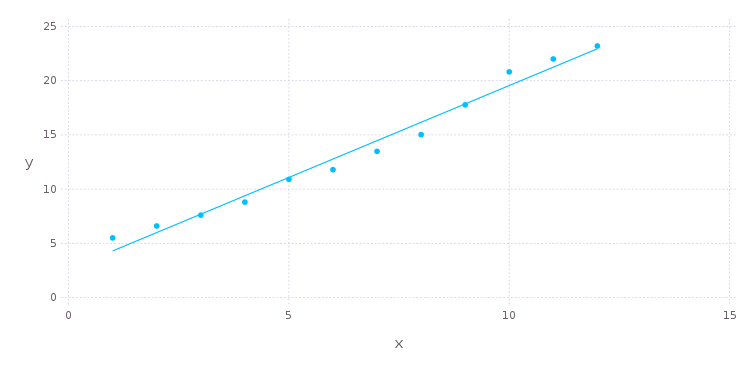

In [31]:
# linear regression 
x = [1.0:12.0;]
y = [5.5, 6.6, 7.6, 8.8, 10.9, 11.79, 13.48, 15.02, 17.77, 20.81, 22.0, 23.2]
a, b = linreg(x, y)  # Linear regression
plot(layer(x=x,y=[a+b*i for i in x], Geom.line),layer(x=x,y=y, Geom.point))

In [32]:
mlm = dataset("mlmRev","Gcsemv")
df = mlm[complete_cases(mlm), :]
println("done")

done


In [33]:
names(df)

5-element Array{Symbol,1}:
 :School 
 :Student
 :Gender 
 :Written
 :Course 

In [34]:
describe(df)

School
Length  1905
Type    Pooled ASCIIString
NAs     0
NA%     0.0%
Unique  73


LoadError: LoadError: ArgumentError: quantiles are undefined in presence of NaNs
while loading In[34], in expression starting on line 1


Student
Length  1905
Type    Pooled ASCIIString
NAs     0
NA%     0.0%
Unique  649

Gender
Length  1905
Type    Pooled ASCIIString
NAs     0
NA%     0.0%
Unique  2

Written


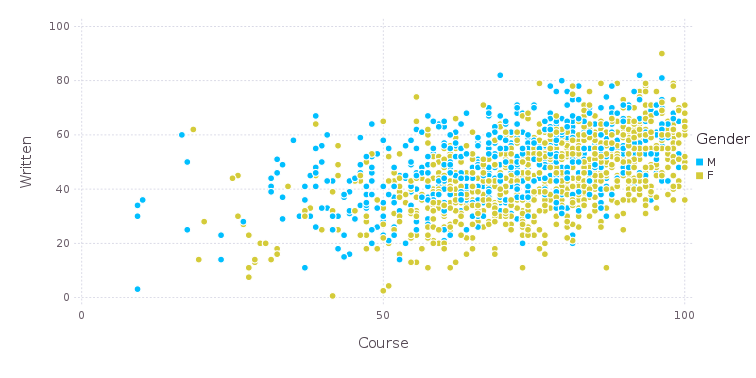

In [35]:
plot(df, x="Course",y="Written", color="Gender")

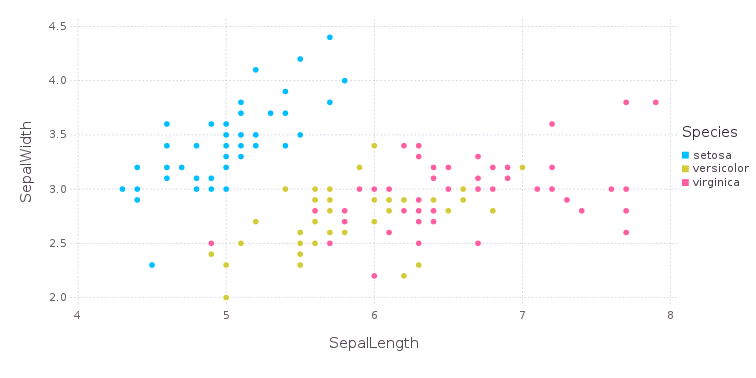

In [36]:
plot(dataset("datasets", "iris"), x="SepalLength", y="SepalWidth",color="Species", Geom.point)

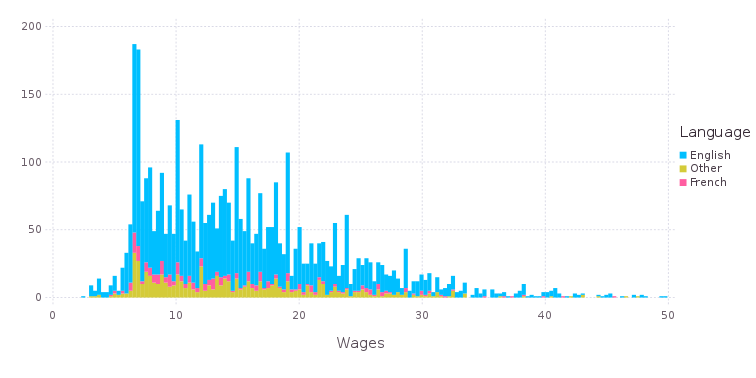

In [37]:
plot(dataset("car", "SLID"), x="Wages", color="Language", Geom.histogram)